### Dataset: Annual User sessions data for an e-commerce company

### This project includes exlporatory analysis of e-commerce data, including data importing and pre-processing, examining distributions of variables and data visualization. Various User retention models are developed and fit statistics are compared.

#### Data Importing and Pre-processing

In [9]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
# Load data
df = pd.read_csv('online_shoppers_intention.csv')

In [11]:
# Confirm file type is CSV
file_path = 'online_shoppers_intention.csv'
file_type= os.path.splitext(file_path)[1]
print(file_type)

# Confirm file was imported as a Pandas DataFrame
is_dataframe = isinstance(df, pd.DataFrame)
print(is_dataframe)


.csv
True


In [12]:
# Examine the first 10 rows of the dataset

df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False
5,0,0.0,0.0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2.0,2,1,3,Returning_Visitor,False,False
6,0,0.0,0.0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2.0,4,3,3,Returning_Visitor,False,False
7,1,0.0,0.0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1.0,2,1,5,Returning_Visitor,True,False
8,0,0.0,0.0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2.0,2,2,3,Returning_Visitor,False,False
9,0,0.0,0.0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2.0,4,1,2,Returning_Visitor,False,False


In [13]:
# Examine dimensions of the dataset
rows, columns = df.shape

print('Rows:', rows, 'Columns:', columns)

# Examine variables and data types of variables
df.dtypes

Rows: 12330 Columns: 18


Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [14]:
# Examine values for categorical data
print(df['VisitorType'].unique())
print(df['Month'].unique())
print(df['Weekend'].unique())
print(df['Revenue'].unique())


['Returning_Visitor' 'New_Visitor' 'Other']
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
[False  True]
[False  True]


In [15]:
# Examine missing data
df.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

There are 128 instances of missing data for 'Informational', 135 instances of missing data for 'PageValues' and 123 instances of missing data for 'OperatingSystems'.

#### Handling Missing Data

Informational - Per the data notes, Informational represents the number of informational pages visited by the visitor and Informational_Duration represents the total time spent on informational pages. Therefore if  Informational_Duration is equal to zero, we impute Informational with the value 0. As this indicates the user spent zero time on any information pages. For missing values of Informational where Informational_Duration is greater than zero, we use the mean value of Informational based on the quartiles of Informational_Duration; The imputed value is proportional to the time spent on the pages.

PageValues - Per the data notes, this variable is from Google Analytics, it estimates the average value of a page based on the revenue generated from transactions that occur after a user visits that page. Therefore if Revenue equals False (no purchase), we impute PageValues with zero, as we assume that the pages visited did not contribute to a purchase thus their value is zero. For other cases, we impute missing values with the mean of PageValues where Revenue equals True.

OperatingSystems - Impute missing values with -999 to represent that the value is 'Unknown'. Using the mean would not be appropriate as Operating Systems is a nominal variable. Additionally, we do not plan to include Operating Systems in the final model, so imputation is not critical.


In [18]:
# Impute missing values of Informational

# Impute missing Informational values as 0 where Informational_duration is 0
df.loc[(df['Informational'].isna()) & (df['Informational_Duration'] == 0), 'Informational'] = 0

# Check missing values
df.isnull().sum()

# There are 24 missing values of Informational still.

Administrative               0
Administrative_Duration      0
Informational               24
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [19]:
# Impute the rest of the missing values of Informational based on the mean of Informational based on quartiles of Informational_duration

# Construct quartile boundaries
Q1 = df[df['Informational_Duration'] > 0]['Informational_Duration'].quantile(0.25)
Q2 = df[df['Informational_Duration'] > 0]['Informational_Duration'].quantile(0.50)
Q3 = df[df['Informational_Duration'] > 0]['Informational_Duration'].quantile(0.75)

print(Q1, Q2, Q3)

# Construct group means based of quartile boundries
mean_Q1 = df[(df['Informational_Duration'] > 0) & (df['Informational_Duration'] <= Q1)]['Informational'].mean()
mean_Q2 = df[(df['Informational_Duration'] > Q1) & (df['Informational_Duration'] <= Q2)]['Informational'].mean()
mean_Q3 = df[(df['Informational_Duration'] > Q2) & (df['Informational_Duration'] <= Q3)]['Informational'].mean()
mean_Q4 = df[(df['Informational_Duration'] > Q3)]['Informational'].mean()

print(mean_Q1, mean_Q2, mean_Q3, mean_Q4)

# Impute means based on the value of Informational_duration
df.loc[(df['Informational'].isna()) & (df['Informational_Duration'] <= Q1), 'Informational'] = mean_Q1
df.loc[(df['Informational'].isna()) & (df['Informational_Duration'] > Q1) & (df['Informational_Duration'] <= Q2), 'Informational'] = mean_Q2
df.loc[(df['Informational'].isna()) & (df['Informational_Duration'] > Q2) & (df['Informational_Duration'] <= Q3), 'Informational'] = mean_Q3
df.loc[(df['Informational'].isna()) & (df['Informational_Duration'] > Q3), 'Informational'] = mean_Q4

# Check missing values
df.isnull().sum()

28.0 76.0 201.4
1.5277310924369747 1.9142857142857144 2.6884422110552766 3.8097643097643097


Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [20]:
# Impute missing values of PageValues

# Impute missing PageValues values as 0 where Revenue is False
df.loc[(df['PageValues'].isna()) & (df['Revenue'] == False), 'PageValues'] = 0

# Calculate mean PageValue for sessions that generated revenue
mean_revenue_value = df[df['Revenue'] == True]['PageValues'].mean()

# Impute missing values where Revenue is True
df.loc[(df['PageValues'].isna()) & (df['Revenue'] == True), 'PageValues'] = mean_revenue_value

# Check missing values
df.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [21]:
# Impute missing values of OperatingSystems

# Impute missing OperatingSystems as '-999' to represent Unknown
df.loc[df['OperatingSystems'].isna(), 'OperatingSystems'] = -999

# Check for any remaining missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [22]:
#Identifying catergorical, ordinal and numerical values within the data set
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [23]:
#categorical 
categorical_var=df.select_dtypes(include ='object').columns
print(categorical_var)


Index(['Month', 'VisitorType'], dtype='object')


In [24]:
#numerical 
numerical_var=df.select_dtypes(include =['int64','float64']).columns
print(numerical_var)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')


In [25]:
#binary (defining the bool variables as binary)
binary_var=df.select_dtypes(include ='bool').columns
print(binary_var)

Index(['Weekend', 'Revenue'], dtype='object')


In [26]:
#calculate mean, meadian, mode for centrality 
centrality_var=df[numerical_var].agg(['mean','median', lambda x: x.mode()[0]])
print(centrality_var)

          Administrative  Administrative_Duration  Informational  \
mean            2.315166                80.818611       0.503283   
median          1.000000                 7.500000       0.000000   
<lambda>        0.000000                 0.000000       0.000000   

          Informational_Duration  ProductRelated  ProductRelated_Duration  \
mean                   34.472398       31.731468              1194.746220   
median                  0.000000       18.000000               598.936905   
<lambda>                0.000000        1.000000                 0.000000   

          BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
mean         0.022191   0.043073    5.893063    0.061427          -7.86326   
median       0.003112   0.025156    0.000000    0.000000           2.00000   
<lambda>     0.000000   0.200000    0.000000    0.000000           2.00000   

           Browser    Region  TrafficType  
mean      2.357097  3.147364     4.069586  
median    2.00000

In [27]:
#calculate distribution by standard dev., variance, min, and max
distribution_var= df[numerical_var].agg(['min','max','var','std'])
print(distribution_var)

     Administrative  Administrative_Duration  Informational  \
min        0.000000                 0.000000       0.000000   
max       27.000000              3398.750000      24.000000   
var       11.034250             31250.852838       1.609330   
std        3.321784               176.779107       1.268594   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
min                0.000000        0.000000             0.000000e+00   
max             2549.375000      705.000000             6.397352e+04   
var            19810.363880     1978.070394             3.662130e+06   
std              140.749294       44.475503             1.913669e+03   

     BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
min     0.000000   0.000000    0.000000    0.000000       -999.000000   
max     0.200000   0.200000  361.763742    1.000000          8.000000   
var     0.002351   0.002362  344.460383    0.039568       9899.987627   
std     0.048488   0.048597   1

In [28]:
#combining centrality and distributions measures to obtain the entire set 
combined_measures= pd.concat([centrality_var,distribution_var])
print(combined_measures)

          Administrative  Administrative_Duration  Informational  \
mean            2.315166                80.818611       0.503283   
median          1.000000                 7.500000       0.000000   
<lambda>        0.000000                 0.000000       0.000000   
min             0.000000                 0.000000       0.000000   
max            27.000000              3398.750000      24.000000   
var            11.034250             31250.852838       1.609330   
std             3.321784               176.779107       1.268594   

          Informational_Duration  ProductRelated  ProductRelated_Duration  \
mean                   34.472398       31.731468             1.194746e+03   
median                  0.000000       18.000000             5.989369e+02   
<lambda>                0.000000        1.000000             0.000000e+00   
min                     0.000000        0.000000             0.000000e+00   
max                  2549.375000      705.000000             6.397352e

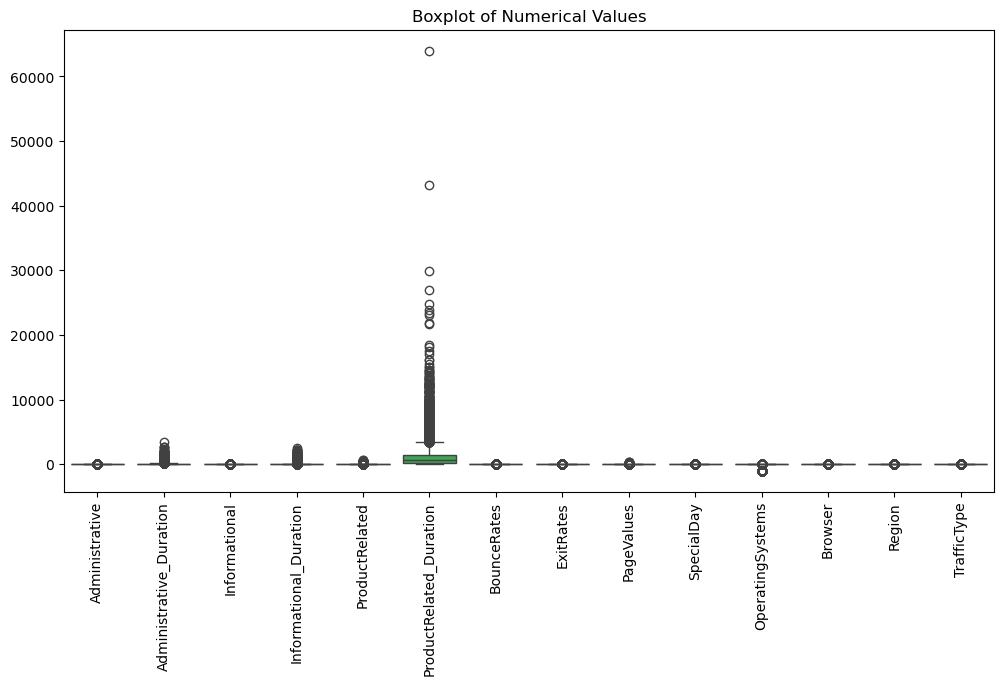

In [29]:
#boxplot to obtain a visual of centrality and distribution 
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_var])
plt.title('Boxplot of Numerical Values')
plt.xticks(rotation=90)
plt.show()

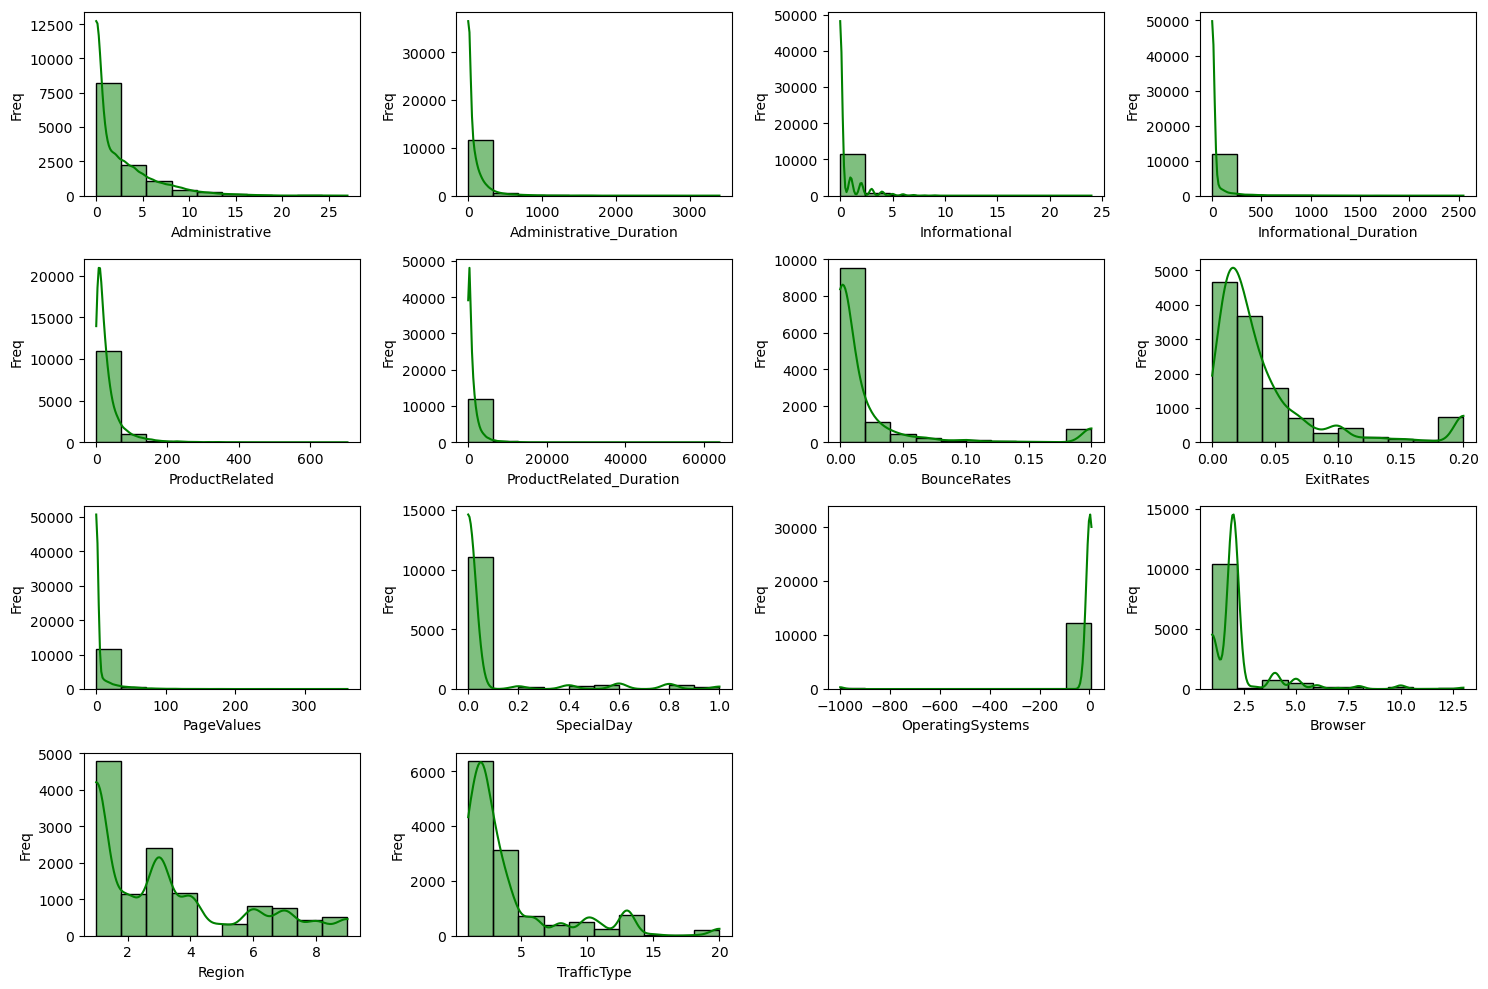

In [30]:
#Histogrm to visualize centrality and distribution
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_var):
    plt.subplot( 5, 4, i+1)  # Creates a subplot (3 rows, 5 columns)
    sns.histplot(df[col], kde=True, bins=10, color='green')
    #plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Freq')
    
plt.tight_layout()  # Adjust spacing
plt.show()

The histograms and the box plot show that many of the continous variables are right skewed. Specifically the variable ProductRelated_Duration has the most variation and widest range of values. The boxplot for ProductRelated_Duration indicates outliers with some users spending over 40,000 minutes on Product related pages.

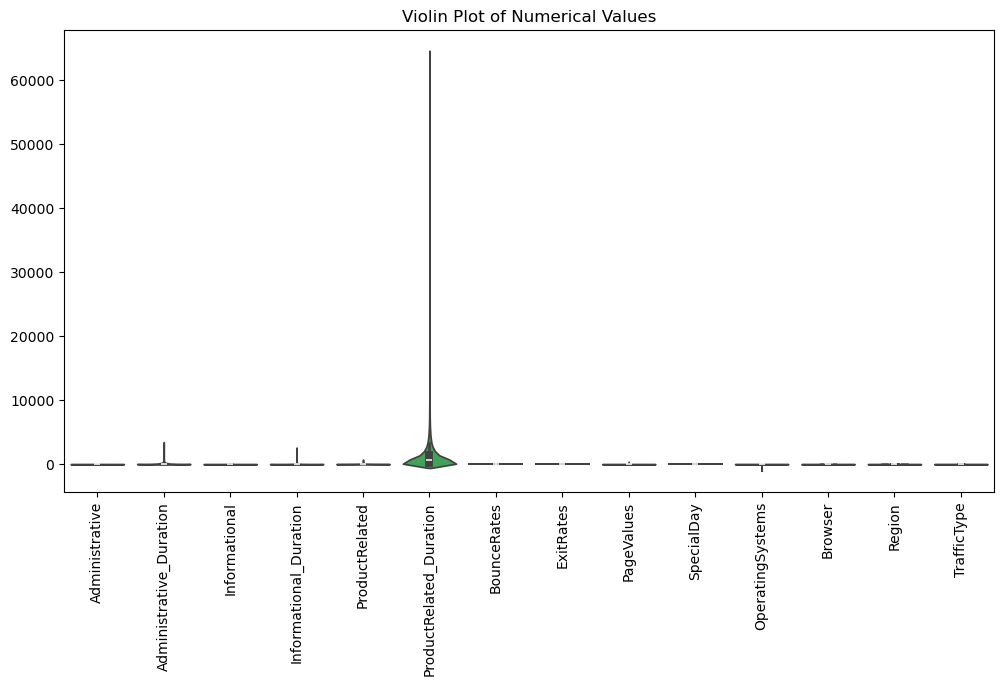

In [31]:
#violin plot to visualize centrality and distribution 
plt.figure(figsize=(12,6))
sns.violinplot(df[numerical_var])
plt.title('Violin Plot of Numerical Values')
plt.xticks(rotation=90)
plt.show()

In [32]:
#numerical values for numerical variables 
numerical_value=df.select_dtypes(include =['int64','float64'])
print(numerical_value)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0            0.0   
1                   0                      0.0            0.0   
2                   0                      0.0            0.0   
3                   0                      0.0            0.0   
4                   0                      0.0            0.0   
...               ...                      ...            ...   
12325               3                    145.0            0.0   
12326               0                      0.0            0.0   
12327               0                      0.0            0.0   
12328               4                     75.0            0.0   
12329               0                      0.0            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

In [33]:
#Correlation matrix of numerical values of numerical variables 
correlation_mat=numerical_value.corr()

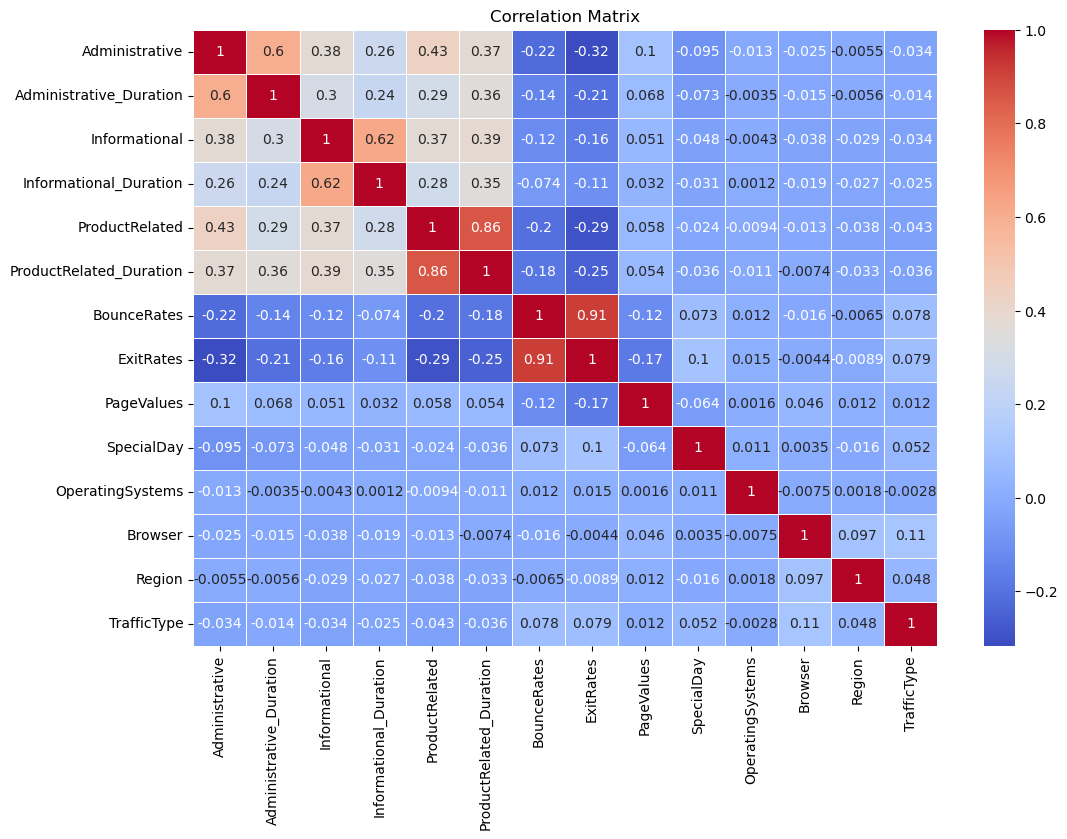

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix can help us identify which values are independent and dependent based on 
its value. Highly positive(1) or highly negative variables(-1) can suggest that the variables are
closely related, hence dependent. Values close to 0 have a weak correlation, hence independent.

In [36]:
#independent variables are values that are less than or equal to 0.5
#if a value doesnt meet that requierment, it will put NaN 
independent_var=correlation_mat[correlation_mat <= 0.5]
#replacing NaN values with 0
independent_var_filled=independent_var.fillna(0) 
print(independent_var_filled)


                         Administrative  Administrative_Duration  \
Administrative                 0.000000                 0.000000   
Administrative_Duration        0.000000                 0.000000   
Informational                  0.376796                 0.303215   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.099931                 0.067817   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.012634                -0.003514   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561         

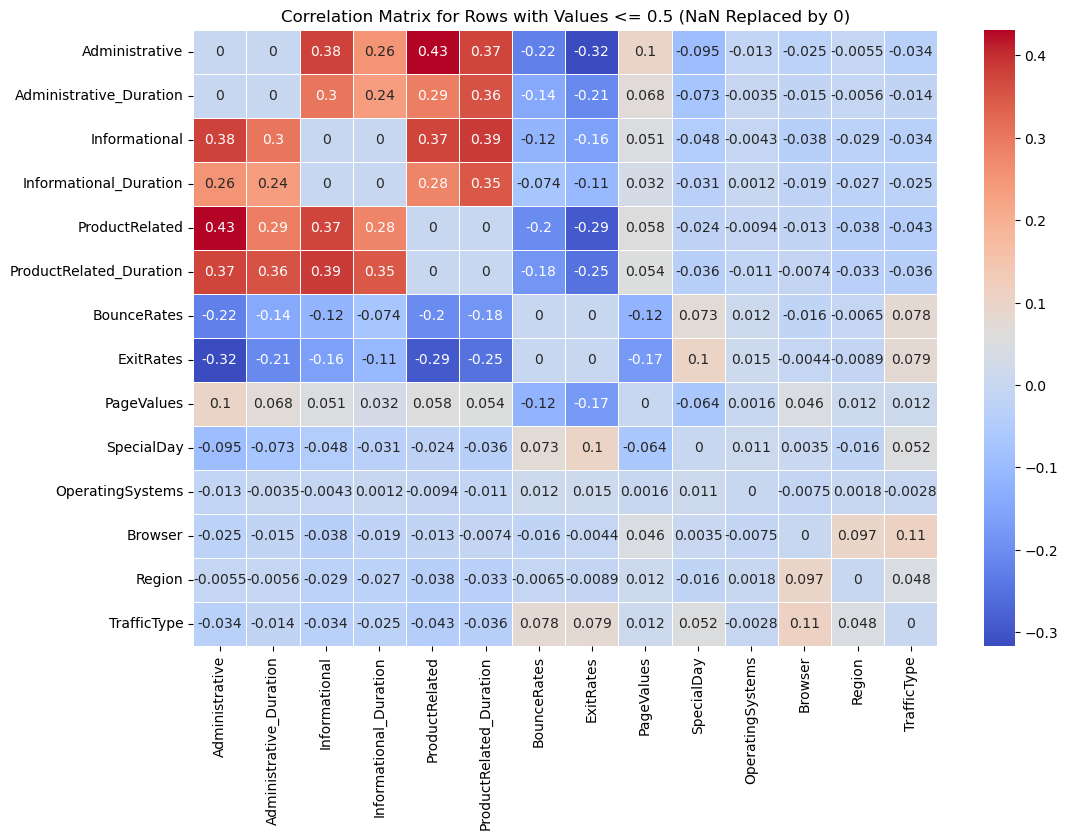

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(independent_var_filled, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Rows with Values <= 0.5 (NaN Replaced by 0)")
plt.show()

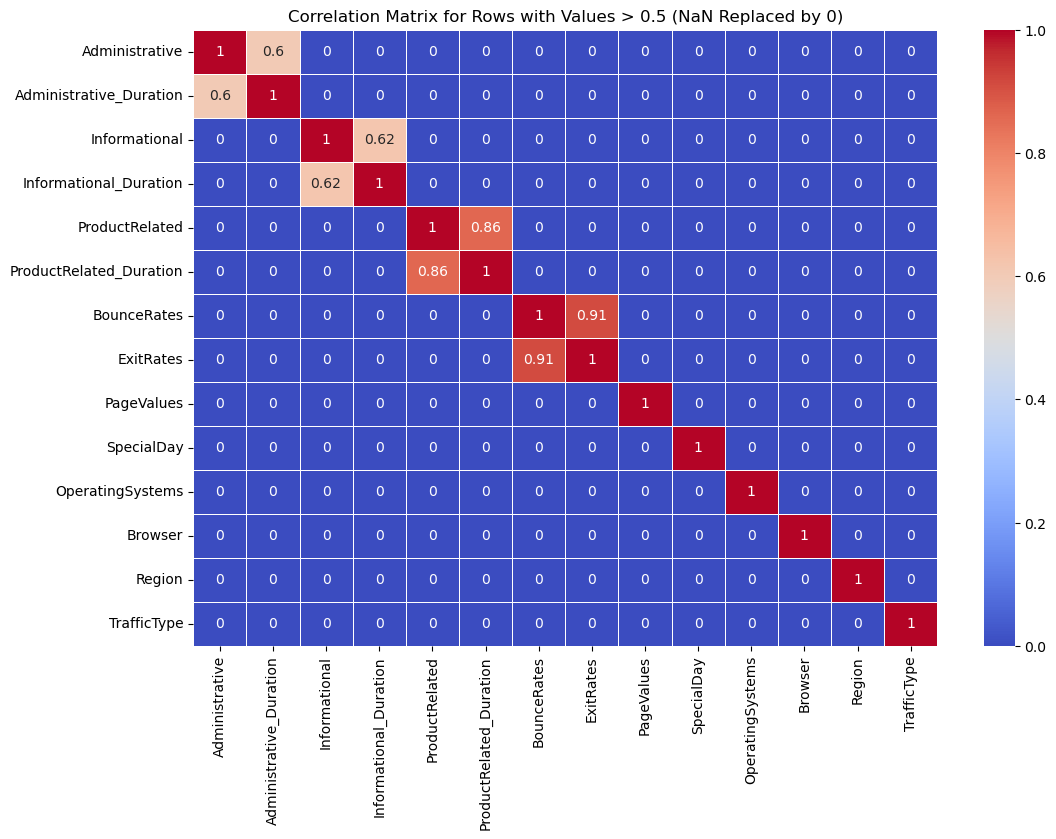

In [38]:
#dependent variables are values that are greater than 0.5
#if a value doesnt meet that requierment, it will put NaN 
dependent_var=correlation_mat[correlation_mat > 0.5]
#replacing NaN values with 0
dependent_var_filled=dependent_var.fillna(0) 
plt.figure(figsize=(12, 8))
sns.heatmap(dependent_var_filled, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Rows with Values > 0.5 (NaN Replaced by 0)")
plt.show()

The correlation matrix indicates that Administrative and Administrative duration are highly positively correlated, the variables Informational and Informational_Duration are highly positively correlated. The variables Product related and ProductRelated _duration are highly positively correlated. The variables Bounce rate and Exit rate are highly positively correlated.

In [39]:
#removing categorical values that dont contribute to numerical value 
df_numeric=df.drop(columns =['Month','VisitorType', 'Weekend','Revenue', 'OperatingSystems', 'Browser', 'Region','TrafficType',])  
#decribe descriptive statistics for data set for each continous variable
print("Descriptive Statistics:")
print(df_numeric.describe())

Descriptive Statistics:
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503283   
std          3.321784               176.779107       1.268594   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                 

In [40]:
print("\nMissing Values:")
print(df_numeric.isnull().sum())


Missing Values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
dtype: int64


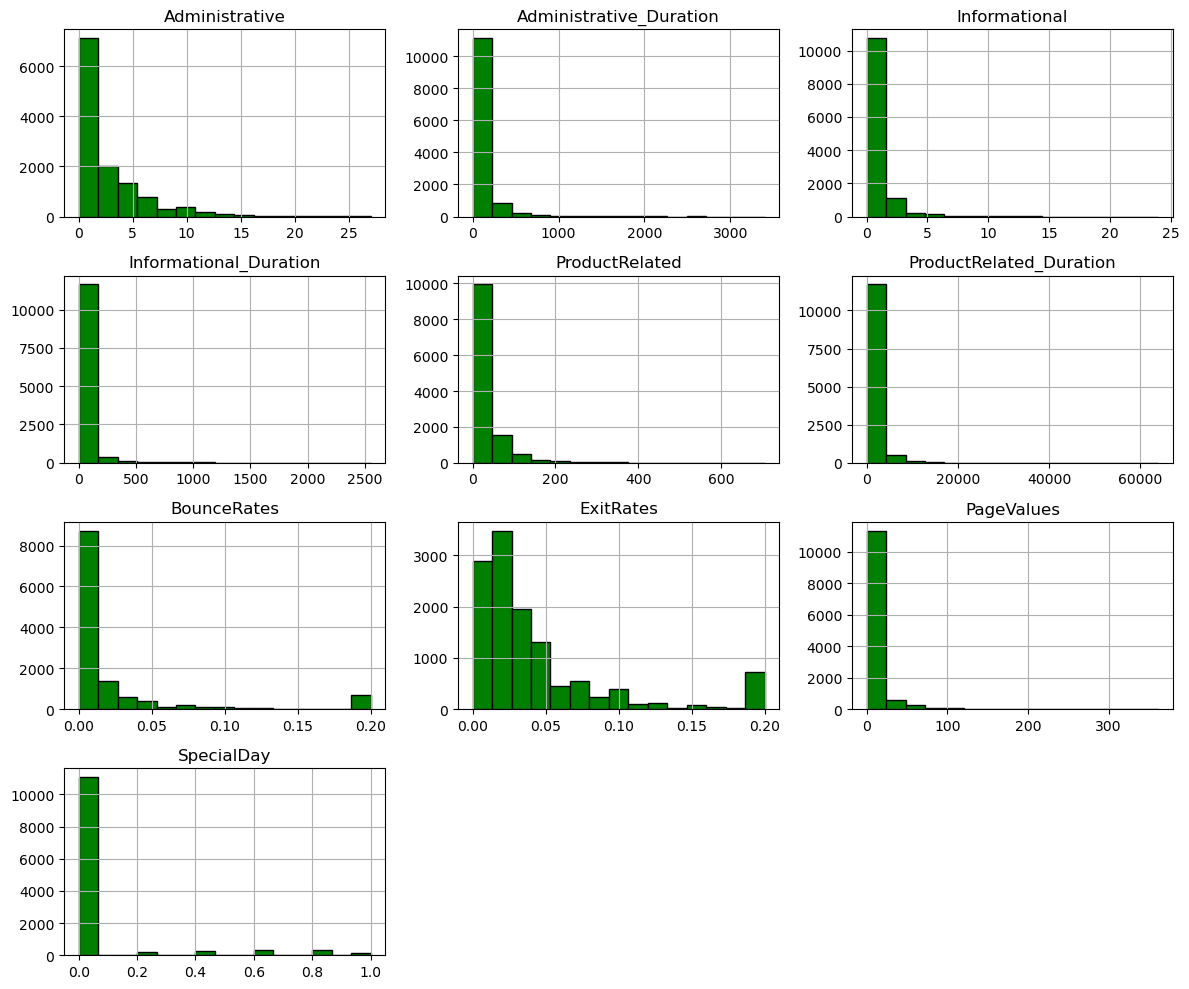

In [41]:
df_numeric.hist(figsize=(12, 10), bins=15, color='green', edgecolor='black')
plt.tight_layout()
plt.show()

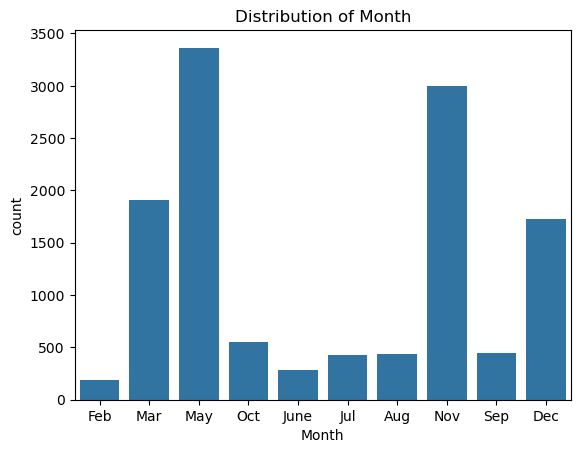

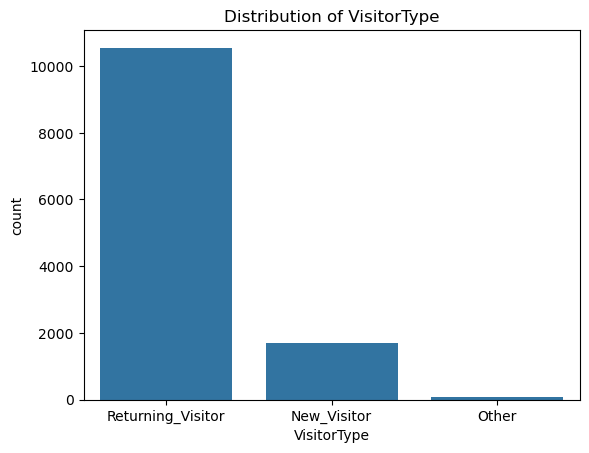

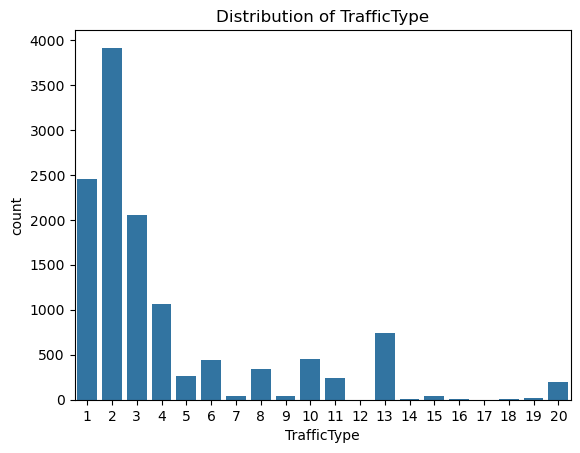

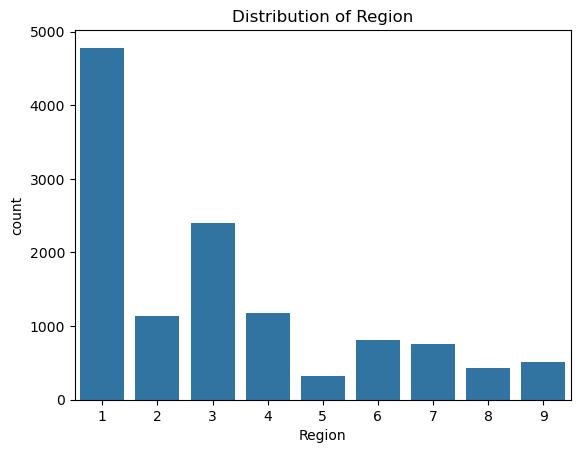

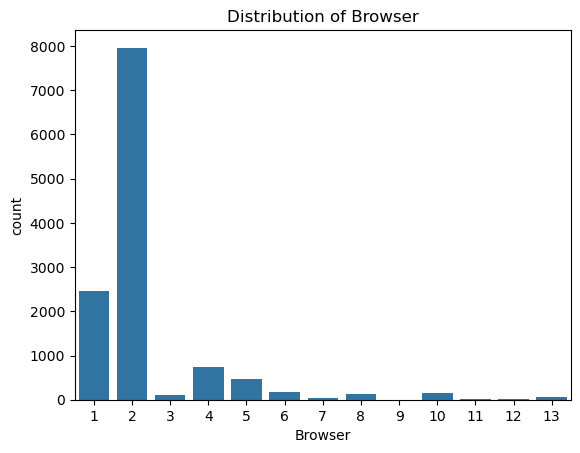

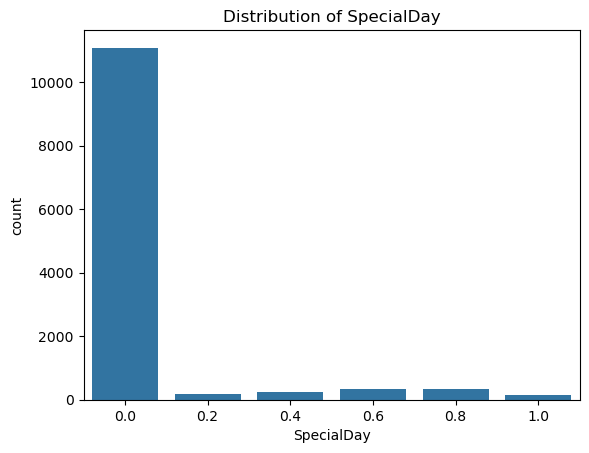

In [42]:
# Count plot for 'Month'
sns.countplot(x='Month', data=df)
plt.title('Distribution of Month')
plt.show()

# Count plot for 'VisitorType'
sns.countplot(x='VisitorType', data=df)
plt.title('Distribution of VisitorType')
plt.show()

# Count plot for 'TrafficType'
sns.countplot(x='TrafficType', data=df)
plt.title('Distribution of TrafficType')
plt.show()

# Count plot for 'Region'
sns.countplot(x='Region', data=df)
plt.title('Distribution of Region')
plt.show()

# Count plot for 'Browser'
sns.countplot(x='Browser', data=df)
plt.title('Distribution of Browser')
plt.show()

# Count plot for 'SpecialDay'
sns.countplot(x='SpecialDay', data=df)
plt.title('Distribution of SpecialDay')
plt.show()


In [43]:
# Examine the proportions of the boolean variables
print(df['Weekend'].value_counts(normalize=True) * 100)
print(df['Revenue'].value_counts(normalize=True) * 100)

Weekend
False    76.739659
True     23.260341
Name: proportion, dtype: float64
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


#### Transform/Construct additonal variables for modeling, #### Transform the data for easier interpretability


In [45]:
# Round Pagealues to two decimal places (to represent dollars and cents)
df['PageValues'] = df['PageValues'].round(2)

# Replace Weekend and Revenue with 0 or 1 values
df['Weekend'] = np.where(df['Weekend'] == True, 1, 0)
df['Revenue'] = np.where(df['Revenue'] == True, 1, 0)


In [46]:
print(df['Weekend'].value_counts(normalize=True) * 100)
print(df['Revenue'].value_counts(normalize=True) * 100)

Weekend
0    76.739659
1    23.260341
Name: proportion, dtype: float64
Revenue
0    84.525547
1    15.474453
Name: proportion, dtype: float64


84.53% of the users did not have a purchase, while 15.47% of the user did have a purchase

In [49]:
#Chi-square test
from scipy.stats import chi2_contingency

# List of categorical variables to test with Revenue
categorical_vars = ['VisitorType', 'Weekend', 'Browser', 'Region','Month','TrafficType','ProductRelated_Duration_bins'] 

# Loop through each variable
for var in categorical_vars:
    print(f"\n Chi-Square Test: Revenue vs. {var}")
    
    # Create table
    ct = pd.crosstab(df['Revenue'], df[var])
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(ct)

    # Print results
    print("Chi-Square:", round(chi2, 4))
    print("p-value:", round(p, 4))




 Chi-Square Test: Revenue vs. VisitorType
Chi-Square: 135.2519
p-value: 0.0

 Chi-Square Test: Revenue vs. Weekend
Chi-Square: 10.391
p-value: 0.0013

 Chi-Square Test: Revenue vs. Browser
Chi-Square: 27.7153
p-value: 0.0061

 Chi-Square Test: Revenue vs. Region
Chi-Square: 9.2528
p-value: 0.3214

 Chi-Square Test: Revenue vs. Month
Chi-Square: 384.9348
p-value: 0.0

 Chi-Square Test: Revenue vs. TrafficType
Chi-Square: 373.1456
p-value: 0.0

 Chi-Square Test: Revenue vs. ProductRelated_Duration_bins
Chi-Square: 535.4453
p-value: 0.0


The chi-sqaure test tells us if there is a significant association between categorical variables. We test the relationship between the categorical variables and our main variable of interest. The variables VisitorType, Weekend, Browser, Month, and TrafficType all have a significant relationship with Revenue (p-value = 0.0)

Supervised or Unsupervised Learning.

We are going to use supervised learning as we have data from the past to learn from to predict
what the future clients might do. The targeted variable is going to be 'Revenue' either if the customer made a purchase (1) or Did not purchase (0). 

Dependent and Independent variables

Dependent = Revenue
Independent = rest of the variables

Understanding the results

Accuracy - How often the model is correct
Precision - Out of all the predicted purchaes, how many wer actually purchases.
                High precison = fewer false positives.
Recall - Out of all actual purchases, how many the model correctly predicted
                Low recall = it missess many real purchases
F1 Score - A balance between precison and recall.

Overall a good starting model. Logistic Regression is fast. 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [55]:

# logistic Regression Model 1: most variables (exclude ProdcutRelated, Administrative, and Information because we know those are highly correlated
# with their duration counterparts
# Select variables
features = ['Weekend', 'Browser', 'ProductRelated_Duration', 'PageValues', 'Administrative_Duration', 'Informational_Duration','VisitorType', 'Month', 'SpecialDay']
target = 'Revenue'

X = df[features]
y = df[target]

# Change categorical variables into dummies
X = pd.get_dummies(X, columns=['Browser', 'VisitorType','Month'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Scale continous variables
columns_to_scale = ['ProductRelated_Duration', 'PageValues','Administrative_Duration', 'Informational_Duration', 'SpecialDay']
scaler = StandardScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


# Fit logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1847  208]
 [ 106  305]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      2055
           1       0.59      0.74      0.66       411

    accuracy                           0.87      2466
   macro avg       0.77      0.82      0.79      2466
weighted avg       0.89      0.87      0.88      2466



In [56]:
#Examine the coefficents 
import statsmodels.api as sm

# Convert X to dummy variables and ensure all data is numeric
X_train_clean = pd.get_dummies(X_train, drop_first=True).astype(float)

# Add constant (intercept)
X_train_const = sm.add_constant(X_train_clean)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit(method='lbfgs', maxiter=1000)


# Show summary with coefficients and p-values
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                 9864
Model:                          Logit   Df Residuals:                     9834
Method:                           MLE   Df Model:                           29
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                  0.3132
Time:                        18:29:04   Log-Likelihood:                -2884.4
converged:                       True   LL-Null:                       -4199.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.4119      0.203     -6.954      0.000      -1.810      -1.014
Weekend                           0.1653      0.080      2.057      0.040 

In [57]:

# logistic Regression Model 2: Keep only variables that were found to be signficant (using the resulting p-values from above)
# Select variables
features = ['Weekend', 'ProductRelated_Duration', 'PageValues','VisitorType', 'SpecialDay']
target = 'Revenue'

X = df[features]
y = df[target]

# Change categorical variables into dummies
X = pd.get_dummies(X, columns=[ 'VisitorType'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Scale continous variables
columns_to_scale = ['ProductRelated_Duration', 'PageValues', 'SpecialDay']
scaler = StandardScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


# Fit logistic regression model
model2 = LogisticRegression(class_weight='balanced', max_iter=1000)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

# Evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1861  194]
 [ 115  296]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      2055
           1       0.60      0.72      0.66       411

    accuracy                           0.87      2466
   macro avg       0.77      0.81      0.79      2466
weighted avg       0.89      0.87      0.88      2466



In [59]:
# logistic Regression Model 3:  Change threshold to 0.3 to fine tune
features = ['Weekend', 'ProductRelated_Duration', 'PageValues','VisitorType', 'SpecialDay']
target = 'Revenue'

X = df[features]
y = df[target]


# Change categorical variables into dummies
X = pd.get_dummies(X, columns=[ 'VisitorType'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Scale continous variables
columns_to_scale = ['ProductRelated_Duration', 'PageValues', 'SpecialDay']
scaler = StandardScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


# Fit logistic regression model
model2 = LogisticRegression(class_weight='balanced', max_iter=1000)
model2.fit(X_train, y_train)


# Predict probabilities
y_proba = model2.predict_proba(X_test)[:, 1]

# Apply custom threshold
threshold = 0.3
y_pred_custom = (y_proba >= threshold).astype(int)

# Evaluate
print("Confusion Matrix (Threshold = 0.3):\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))

Confusion Matrix (Threshold = 0.3):
 [[1466  589]
 [  41  370]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.71      0.82      2055
           1       0.39      0.90      0.54       411

    accuracy                           0.74      2466
   macro avg       0.68      0.81      0.68      2466
weighted avg       0.87      0.74      0.78      2466



Changing the threshold improves recall but less precision.

In [127]:
# logistic Regression Model 4:  Change threshold to 0.8 to fine tune
features = ['Weekend', 'ProductRelated_Duration', 'PageValues','VisitorType', 'SpecialDay']
target = 'Revenue'

X = df[features]
y = df[target]


# Change categorical variables into dummies
X = pd.get_dummies(X, columns=[ 'VisitorType'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Scale continous variables
columns_to_scale = ['ProductRelated_Duration', 'PageValues', 'SpecialDay']
scaler = StandardScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


# Fit logistic regression model
model2 = LogisticRegression(class_weight='balanced', max_iter=1000)
model2.fit(X_train, y_train)


# Predict probabilities
y_proba = model2.predict_proba(X_test)[:, 1]

# Apply custom threshold
threshold = 0.8
y_pred_custom = (y_proba >= threshold).astype(int)

# Evaluate
print("Confusion Matrix (Threshold = 0.8):\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))

Confusion Matrix (Threshold = 0.8):
 [[1973   82]
 [ 216  195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2055
           1       0.70      0.47      0.57       411

    accuracy                           0.88      2466
   macro avg       0.80      0.72      0.75      2466
weighted avg       0.87      0.88      0.87      2466



In [115]:
# Random Forest with limited variables - Model 5

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Features and target
features = ['Weekend', 'ProductRelated_Duration', 'PageValues','VisitorType', 'SpecialDay']
target = 'Revenue'

X = df[features]
y = df[target].astype(int)  # Ensure binary (0/1)

# One-hot encode VisitorType
X = pd.get_dummies(X, columns=['VisitorType'], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale selected features
columns_to_scale = ['ProductRelated_Duration', 'PageValues', 'SpecialDay']
X_train = X_train.copy()
X_test = X_test.copy()

scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


# Create and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)


# Predict probabilities
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Apply custom threshold
threshold = 0.5
y_pred_rf = (y_proba_rf >= threshold).astype(int)

# Evaluate
print(f"Confusion Matrix (Random Forest, Threshold = 0.5):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix (Random Forest, Threshold = 0.5):
[[1900  184]
 [ 195  187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2084
           1       0.50      0.49      0.50       382

    accuracy                           0.85      2466
   macro avg       0.71      0.70      0.70      2466
weighted avg       0.84      0.85      0.85      2466



In [125]:
# Random Forest with additional variables - Model 6


from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# New feature list
features = [
    'Weekend', 'ProductRelated_Duration', 'PageValues', 'VisitorType', 'SpecialDay',
    'BounceRates', 'ExitRates', 'Administrative_Duration', 'Informational_Duration', 'Total_Pages'
]

target = 'Revenue'

df['Total_Pages'] = df['Administrative'] + df['Informational'] + df['ProductRelated']


# Prepare data
X = df[features]
y = df[target].astype(int)

# Encode categorical
X = pd.get_dummies(X, columns=['VisitorType'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale numeric features
columns_to_scale = [
    'ProductRelated_Duration', 'PageValues', 'SpecialDay',
    'BounceRates', 'ExitRates', 'Administrative_Duration',
    'Informational_Duration', 'Total_Pages'
]

X_train = X_train.copy()
X_test = X_test.copy()

scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Fit random forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict with threshold
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_rf = (y_proba_rf >= threshold).astype(int)

# Evaluate
print(f"\nConfusion Matrix (Random Forest with More Features, Threshold = 0.4):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



Confusion Matrix (Random Forest with More Features, Threshold = 0.4):
[[1951  133]
 [ 147  235]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2084
           1       0.64      0.62      0.63       382

    accuracy                           0.89      2466
   macro avg       0.78      0.78      0.78      2466
weighted avg       0.88      0.89      0.89      2466



Supervised or Unsupervised Learning:

Results from different model and tuning the models. 

Model 1 Accuracy -- 0.87
Logistic Regression Trial 1 -- All variables -- balanced - No Tunning the threshold


Type	         Count	       Meaning
True Negatives -- 1847 --	Non-buyers correctly counted
False Positives	-- 208 --	Non-buyers incorrectly predicted as buyers
False Negatives	-- 106 --	Buyers missed (could’ve converted)
True Positives	-- 305 --	Buyers correctly predicted

Model 2 Accuracy -- 0.87
Logistic Regression Trail 2  -- Limited Features in consideration -- balanced -- No Tunning the threshold


Type	         Count	       Meaning
True Negatives -- 1861 --	Non-buyers correctly counted
False Positives	-- 194 --	Non-buyers incorrectly predicted as buyers
False Negatives	-- 115 --	Buyers missed (could’ve converted)
True Positives	-- 296 --	Buyers correctly predicted

Model 3 Accuracy -- 0.74
Logistic Regression Trial 3 --  Limited Features in consideration -- Threshold adjusted = 0.3 


Type	         Count	       Meaning
True Negatives -- 1466 --	Non-buyers correctly counted
False Positives	-- 589 --	Non-buyers incorrectly predicted as buyers
False Negatives	-- 41 --	Buyers missed (could’ve converted)
True Positives	-- 370 --	Buyers correctly predicted 

Model 4 Accuracy -- 0.88
Logistic Regression Trial 4  -- Limited Features in consideration -- Threshold Adjusted = 0.8


Type	         Count	       Meaning
True Negatives -- 1973 --	Non-buyers correctly counted
False Positives	-- 82 --	Non-buyers incorrectly predicted as buyers
False Negatives	-- 216 --	Buyers missed (could’ve converted)
True Positives	-- 195 --	Buyers correctly predicted 

Model 5 Accuracy -- 0.85
Random Forest Trial 5 -- Threshold = 0.5 -- Limited Features in consideration


Type	         Count	       Meaning
True Negatives -- 1900 --	Non-buyers correctly counted
False Positives	-- 184 --	Non-buyers incorrectly predicted as buyers
False Negatives	-- 195 --	Buyers missed (could’ve converted)
True Positives	-- 187 --	Buyers correctly predicted 


Model 6 Accuracy -- 0.89
Random Forest Trial 6 -- Threshold = 0.4 -- More Features/variables in consideration


Type	         Count	       Meaning
True Negatives -- 1951 --	Non-buyers correctly counted
False Positives	-- 133 --	Non-buyers incorrectly predicted as buyers
False Negatives	-- 147 --	Buyers missed (could’ve converted)
True Positives	-- 235 --	Buyers correctly predicted

We determine that Model 6 is the best model with highest accuracy of 0.89


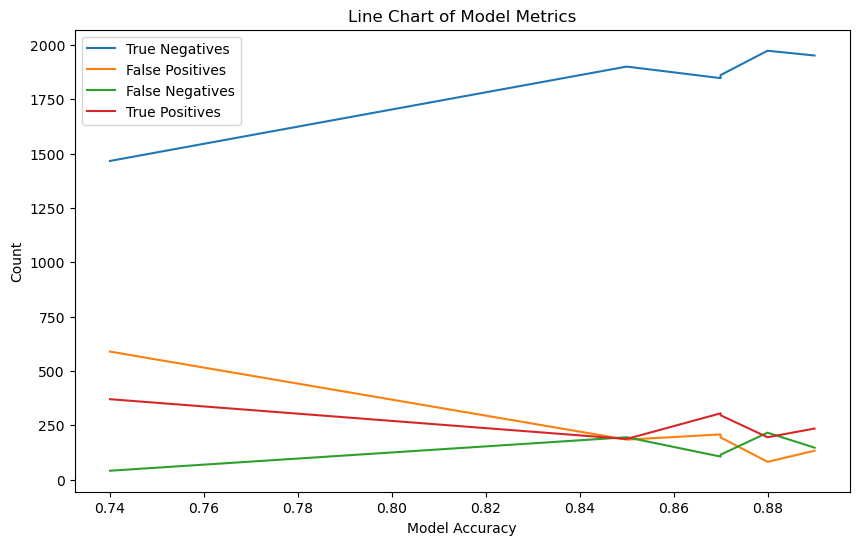

In [133]:
# Code provided by Diagram-1.0

import matplotlib.pyplot as plt

models = [0.74, 0.85, 0.87, 0.87, 0.88, 0.89]

true_negatives = [1466, 1900, 1847, 1861, 1973, 1951]

false_positives = [589, 184, 208, 194, 82, 133]

false_negatives = [41, 195, 106, 115, 216, 147]

true_positives = [370, 187, 305, 296, 195, 235]

plt.figure(figsize=(10,6))

plt.plot([0.74, 0.85, 0.87, 0.87, 0.88, 0.89], true_negatives, label='True Negatives')

plt.plot([0.74, 0.85, 0.87, 0.87, 0.88, 0.89], false_positives, label='False Positives')

plt.plot([0.74, 0.85, 0.87, 0.87, 0.88, 0.89], false_negatives, label='False Negatives')

plt.plot([0.74, 0.85, 0.87, 0.87, 0.88, 0.89], true_positives, label='True Positives')

plt.xlabel('Model Accuracy')

plt.ylabel('Count')

plt.title('Line Chart of Model Metrics')

plt.legend()

plt.show()